# KNN Classifier for Diabetes Dataset

This notebook implements a K-Nearest Neighbors classifier to predict the onset of diabetes based on the PIMA Indians Diabetes Dataset.

## 1. Import Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

## 2. Load and Inspect Data

In [18]:
# Load dataset
try:
    data = pd.read_csv("8_diabetes.csv")
    print(data.head())
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please make sure the file is in the same directory.")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


## 3. Data Pre-processing

In this dataset, '0' values in columns like 'Glucose' or 'BMI' are not physiologically possible and represent missing data. We will replace these 0s with the mean of the respective column.

In [19]:
# Check for null or missing values
print("\nMissing values per column (before cleaning):", data.isnull().sum())


Missing values per column (before cleaning): Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [20]:
# Replace zeros with NaN, then fill NaN with mean
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace=True)

print("\nData after replacing 0s:")
print(data.describe())


Data after replacing 0s:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.688802      72.386719      29.108073  155.768229   
std       3.369578   30.435959      12.096642       8.791221   85.021408   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  156.000000   
75%       6.000000  140.250000      80.000000      32.000000  156.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.450911    0.471876   33.240885    0.348958  
std      6.875366    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     2

## 4. Feature and Target Split

In [21]:
# Features and target
X = data.iloc[:, :8]  # first 8 columns are features
Y = data['Outcome']    # target column

print("Features (X) shape:", X.shape)
print("Target (Y) shape:", Y.shape)

Features (X) shape: (768, 8)
Target (Y) shape: (768,)


In [22]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 5. Outlier Detection

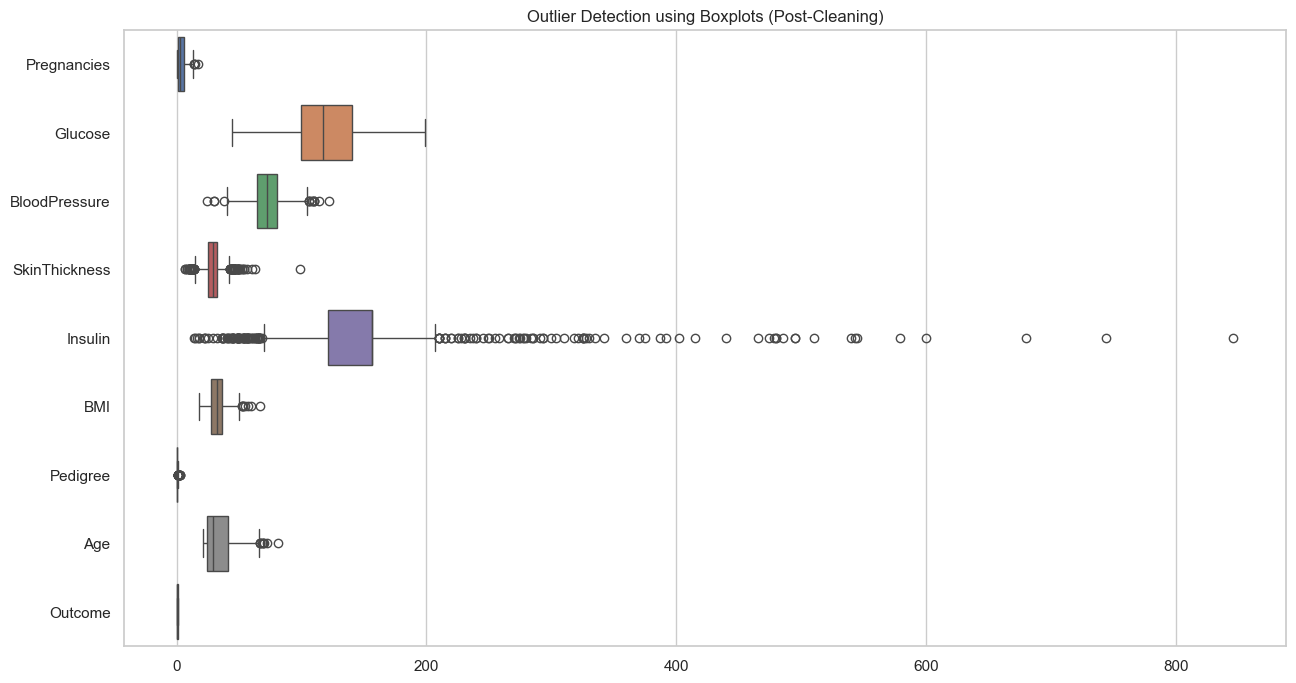

In [23]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient='h') # Use data=data to plot all columns
plt.title("Outlier Detection using Boxplots (Post-Cleaning)")
plt.show()

In [24]:
# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Display count of outliers per column
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)


Number of Outliers per Feature:
 Pregnancies        4
Glucose            0
BloodPressure     14
SkinThickness     87
Insulin          159
BMI                8
Pedigree          29
Age                9
Outcome            0
dtype: int64


## 6. Model Training and Evaluation (k=5)

In [25]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [26]:
# Predictions
knn_pred = knn.predict(X_test)

# Metrics
cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
f1 = f1_score(Y_test, knn_pred)

# Print results
print("--- Results for k=5 ---")
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Error Rate:", error_rate)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

--- Results for k=5 ---
Confusion Matrix:
 [[88 19]
 [19 28]]
Accuracy Score: 0.7532467532467533
Error Rate: 0.24675324675324672
Precision Score: 0.5957446808510638
Recall Score: 0.5957446808510638
F1 Score: 0.5957446808510638


## 7. Hyperparameter Tuning (Finding the Best 'k')

In [27]:
# Test with different k values
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    accuracy_scores.append(acc)
    print(f"k={k} --> Accuracy: {acc:.4f}")

k=3 --> Accuracy: 0.7273
k=5 --> Accuracy: 0.7532
k=7 --> Accuracy: 0.7597
k=9 --> Accuracy: 0.7532
k=11 --> Accuracy: 0.7532
k=13 --> Accuracy: 0.7792
k=15 --> Accuracy: 0.7727
k=17 --> Accuracy: 0.7662
k=19 --> Accuracy: 0.7792
k=21 --> Accuracy: 0.7987


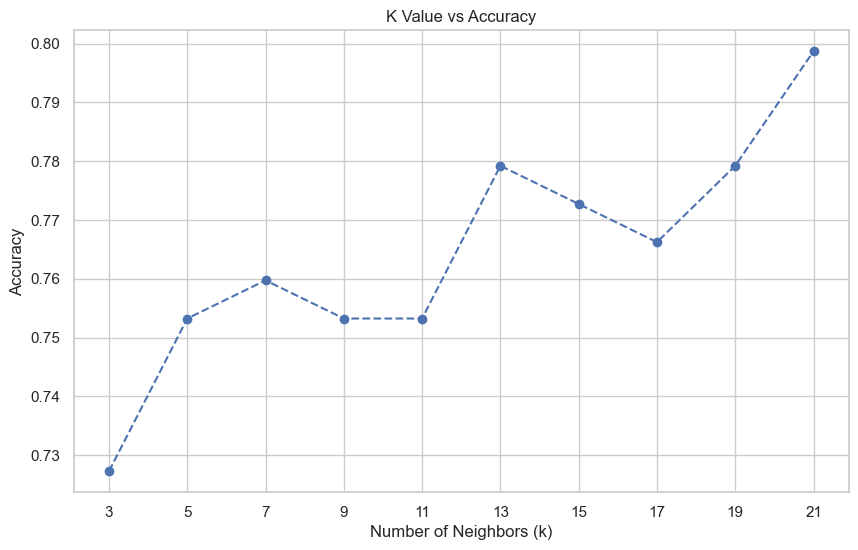

In [28]:
# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()